# Fully Connected NN

In [1]:
# Import io functions
from io_functions import *
from draw_functions import *

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.


## Load the gammas and pi0s as nparrays of 20x20x25 event arrays

## Prepare the data

In [2]:
train_data, test_data, train_labels, test_labels = train_test(shape=(1, 20, 20, 25), split=0.33)

In [3]:
train_data.shape

(54236, 1, 20, 20, 25)

## Create and train the model

In [4]:
# Convolutional Layers
model = Sequential()
model.add(Convolution3D(3, 4, 4, 5, input_shape = (1, 20, 20, 25), activation='relu'))
model.add(MaxPooling3D())
model.add(Flatten())

# Dense layer
model.add(Dense(10000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd')
model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution3d_1 (Convolution3D)    (None, 3, 17, 17, 21243         convolution3d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling3d_1 (MaxPooling3D)      (None, 3, 8, 8, 10) 0           convolution3d_1[0][0]            
____________________________________________________________________________________________________
flatten_1 (Flatten)                (None, 1920)        0           maxpooling3d_1[0][0]             
____________________________________________________________________________________________________
dense_1 (Dense)                    (None, 10000)       19210000    flatten_1[0][0]                  
___________________________________________________________________________________________

In [ ]:
# Train the network
model.fit(train_data, train_labels, nb_epoch=1, batch_size=100, verbose=0)

In [5]:
model1 = Sequential()
model1.add(Convolution3D(3, 4, 4, 5, input_shape = (1, 20, 20, 25), activation='relu'))
model1.add(MaxPooling3D())
model1.add(Flatten())

model2 = Sequential()
model2.add(Convolution3D(3, 3, 3, 4, input_shape = (1, 20, 20, 25), activation='relu'))
model2.add(MaxPooling3D())
model2.add(Flatten())

## join the two
bmodel = Sequential()
bmodel.add(Merge([model1,model2], mode='concat'))

## fully connected ending
bmodel.add(Dense(1000, activation='relu'))
bmodel.add(Dropout(0.5))
bmodel.add(Dense(1, init='uniform', activation='sigmoid'))

bmodel.compile(loss='binary_crossentropy', optimizer='sgd')
bmodel.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution3d_2 (Convolution3D)    (None, 3, 17, 17, 21243                                          
____________________________________________________________________________________________________
maxpooling3d_2 (MaxPooling3D)      (None, 3, 8, 8, 10) 0                                            
____________________________________________________________________________________________________
flatten_2 (Flatten)                (None, 1920)        0                                            
____________________________________________________________________________________________________
convolution3d_3 (Convolution3D)    (None, 3, 18, 18, 22111                                          
___________________________________________________________________________________________

In [13]:
bmodel.fit([train_data,train_data], train_labels, nb_epoch=10, batch_size=1000, verbose=1)

Epoch 1/10
54236/54236 [==============================] - 121s - loss: 0.5390   
Epoch 2/10
54236/54236 [==============================] - 123s - loss: 0.4723   
Epoch 3/10
54236/54236 [==============================] - 122s - loss: 0.4310   
Epoch 4/10
54236/54236 [==============================] - 124s - loss: 0.3966   
Epoch 5/10
54236/54236 [==============================] - 124s - loss: 0.3655   
Epoch 6/10
54236/54236 [==============================] - 124s - loss: 0.3533   
Epoch 7/10
54236/54236 [==============================] - 131s - loss: 0.3369   
Epoch 8/10
54236/54236 [==============================] - 150s - loss: 0.3247   
Epoch 9/10
54236/54236 [==============================] - 150s - loss: 0.3129   
Epoch 10/10
54236/54236 [==============================] - 173s - loss: 0.3093   


### Classification Histogram

In [ ]:
# Get the test signal and background to make the histogram
test_signal = test_data[np.where(test_labels==1)]
test_bkg    = test_data[np.where(test_labels==0)]

# Calculate the probabilities for the test sets
p_signal    = bmodel.predict([test_signal,test_signal])
p_bkg       = bmodel.predict([test_bkg,test_bkg])

# Draw classification histogram
plt.hist(p_signal, 50, normed=1, facecolor='blue', alpha=0.4, label='gamma')
plt.hist(p_bkg , 50, normed=1, facecolor='red' , alpha=0.4, label='pi0')
plt.xlabel('Prediction')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.yscale('log')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

### ROC Curve

In [ ]:
# Get classification predictions
predictions = bmodel.predict([test_data,test_data])

NameError: name 'bmodel' is not defined

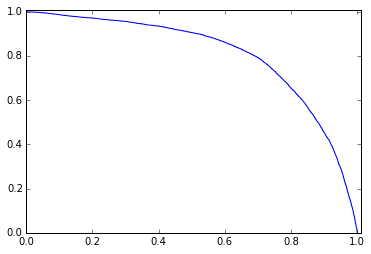

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_labels, predictions)
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.plot( tpr, 1-fpr )

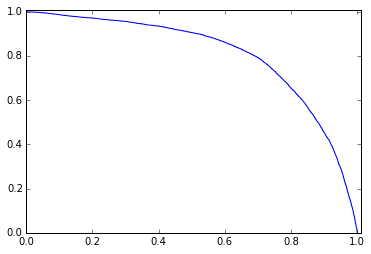

In [15]:
fpr, tpr, _ = roc_curve(test_labels, predictions)
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.plot( tpr, 1-fpr )

In [11]:
test_labels

array([ 1.,  1.,  1., ...,  1.,  0.,  1.])

In [10]:
predictions

array([[ 0.04905363],
       [ 0.11018593],
       [ 0.18781023],
       ..., 
       [ 0.1830063 ],
       [ 0.09541868],
       [ 0.54028255]])